In [190]:
! pip3 install pandas
! pip3 install matplotlib
! pip3 install numpy
! pip3 install seaborn
! pip3 install scikit-learn
! pip install pandas
! pip install matplotlib
! pip install numpy
! pip install seaborn
! pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [191]:
import pandas as pd
import numpy as np
import seaborn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [192]:
data = pd.read_csv("data_banknote_authentication.txt", header=None, )
data.columns = ["f_1", "f_2", "f_3", "f_4", "class"]
data["color"] = np.where(data['class']==0, "green", "red")
data

,f_1,f_2,f_3,f_4,class,color
0,3.62160,8.66610,-2.8073,-0.44699,0,green
1,4.54590,8.16740,-2.4586,-1.46210,0,green
2,3.86600,-2.63830,1.9242,0.10645,0,green
3,3.45660,9.52280,-4.0112,-3.59440,0,green
4,0.32924,-4.45520,4.5718,-0.98880,0,green
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,red
1368,-1.38870,-4.87730,6.4774,0.34179,1,red
1369,-3.75030,-13.45860,17.5932,-2.77710,1,red
1370,-3.56370,-8.38270,12.3930,-1.28230,1,red


In [193]:
mean = data.mean()
std = data.std()
mean0 = data[data["class"] == 0].mean()
std0 = data[data["class"] == 0].std()
mean1 = data[data["class"] == 1].mean()
std1 = data[data["class"] == 1].std()
pd.DataFrame({"µ(f1)":[mean0[0], mean1[0], mean[0]], "σ(f1)":[std0[0], std1[0], std[0]], "µ(f2)":[mean0[1], mean1[1], mean[1]], "σ(f2)":[std0[1], std1[1], std[1]],"µ(f3)":[mean0[2], mean1[2], mean[2]], "σ(f3)":[std0[2], std1[2], std[2]],"µ(f4)":[mean0[3], mean1[3], mean[3]], "σ(f4)":[std0[3], std1[3], std[3]]}, index=["0","1", "all"])

,µ(f1),σ(f1),µ(f2),σ(f2),µ(f3),σ(f3),µ(f4),σ(f4)
0,2.276686,2.019348,4.256627,5.138792,0.796718,3.239894,-1.147640,2.125077
1,-1.868443,1.881183,-0.993576,5.404884,2.148271,5.261811,-1.246641,2.070984
all,0.433735,2.842763,1.922353,5.869047,1.397627,4.310030,-1.191657,2.101013


In [194]:
data = data.sample(frac=1).reset_index(drop=True)
data_train = data.iloc[:int(data.shape[0]/2)-1, :]
data_test = data.iloc[int(data.shape[0]/2):,:]

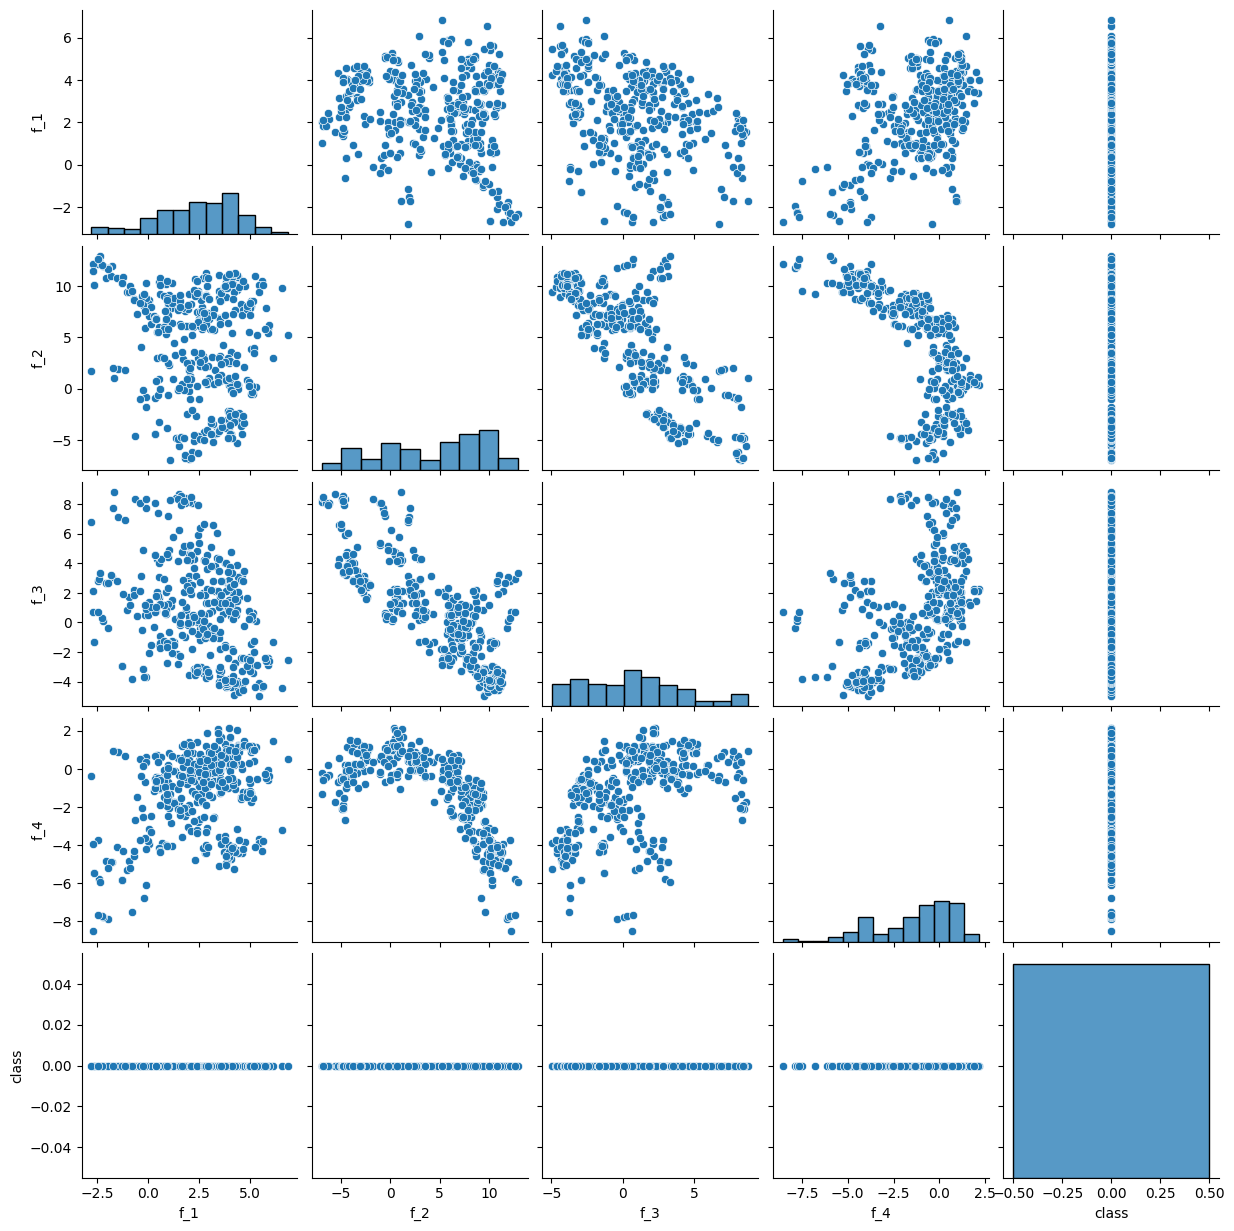

In [195]:
seaborn.pairplot(data_train[data_train["color"] == "green"])

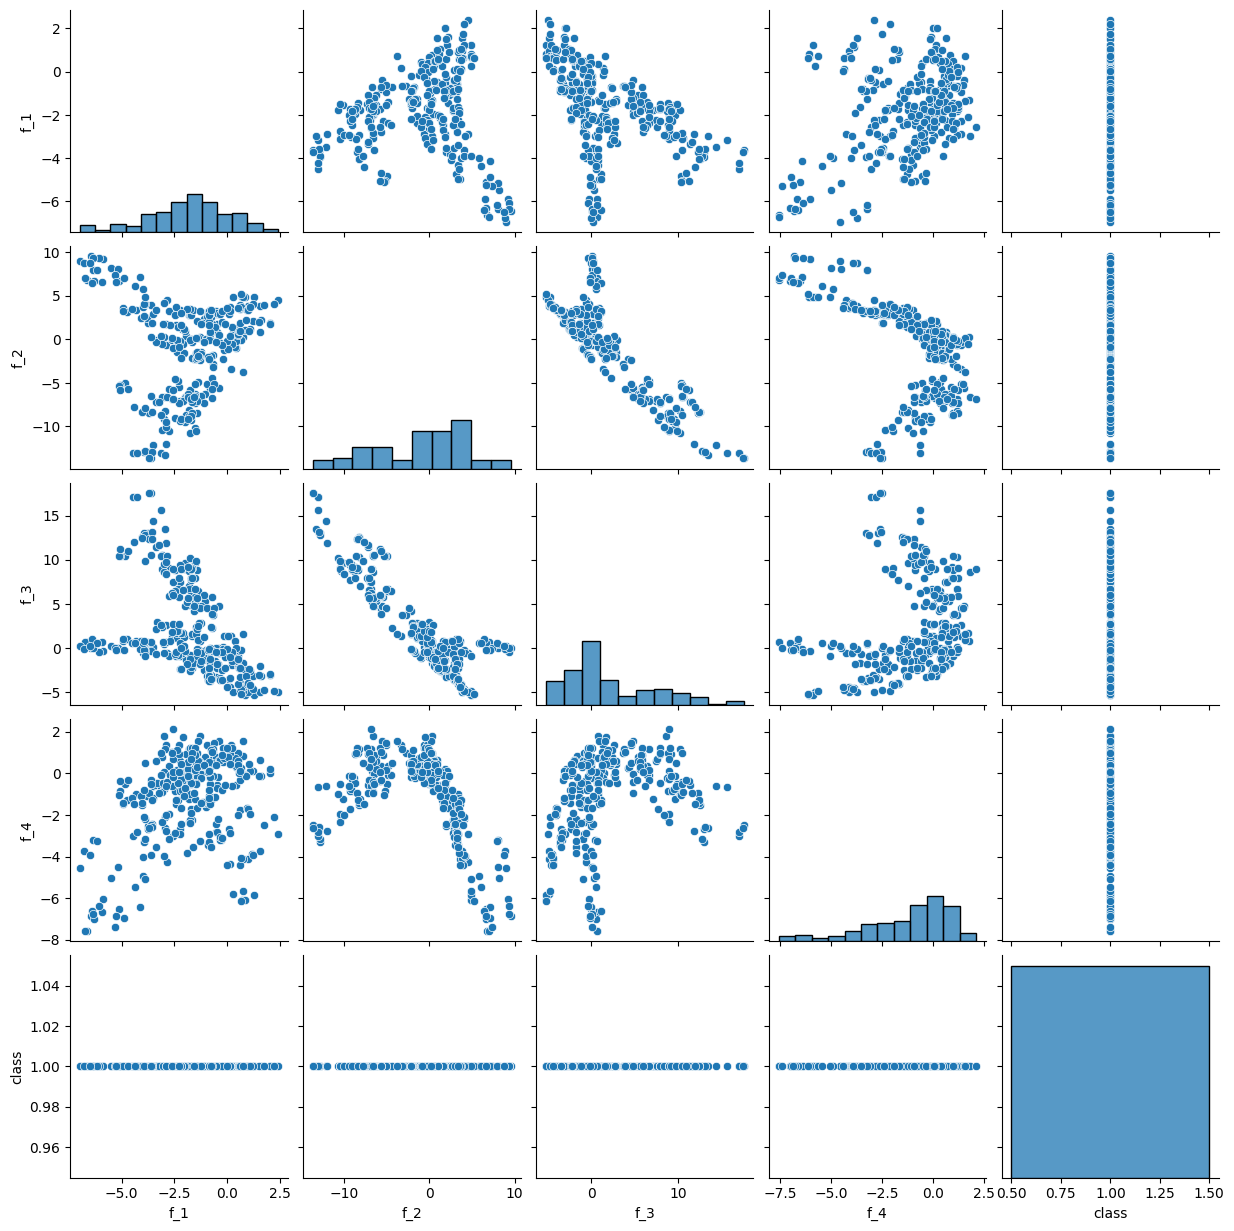

In [196]:
seaborn.pairplot(data_train[data_train["color"] == "red"])

In [212]:
data_train_predict = data_test
data_train_predict["predict"] = np.where((data_train_predict["f_1"] >-1) & (data_train_predict["f_2"] > 5) & (data_train_predict["f_4"] >-7), "green", "red")
data_train_predict[data_train_predict["predict"]==data_train_predict["color"]].shape[0]/data_train_predict.shape[0]
data_train_predict

,f_1,f_2,f_3,f_4,class,color,predict
686,0.722520,-0.053811,5.67030,-1.350900,0,green,red
687,0.188680,0.701480,-0.51182,0.005589,1,red,red
688,-2.178600,-6.447900,6.03440,-0.207770,1,red,red
689,5.807000,5.009700,-2.23840,0.438780,0,green,green
690,2.084300,6.625800,0.48382,-2.213400,0,green,green
...,...,...,...,...,...,...,...
1367,0.929700,-3.797100,4.64290,-0.295700,0,green,red
1368,-1.587700,-6.607200,5.80220,0.315930,1,red,red
1369,1.105000,7.443200,0.41099,-3.033200,0,green,green
1370,0.045304,6.733400,1.07080,-0.933200,0,green,green


In [198]:
tp = data_train_predict[data_train_predict["predict"]==data_train_predict["color"]][data_train_predict["predict"] == "green"].shape[0]
fp = data_train_predict[data_train_predict["predict"]!=data_train_predict["color"]][data_train_predict["predict"] == "green"].shape[0]
tn = data_train_predict[data_train_predict["predict"]==data_train_predict["color"]][data_train_predict["predict"] == "red"].shape[0]
fn = data_train_predict[data_train_predict["predict"]!=data_train_predict["color"]][data_train_predict["predict"] == "red"].shape[0]
print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
print("TPR -",tp/(tp+fn))
print("TNR -",tn/(tn+fp))

TP - 163 , FP - 1 , TN - 302 , FN -  220
TPR - 0.4255874673629243
TNR - 0.9966996699669967


In [199]:
pd.DataFrame([[tp,fp,tn,fn,data_train_predict[data_train_predict["predict"]==data_train_predict["color"]].shape[0]/data_train_predict.shape[0], tp/(tp+fn), tn/(tn+fp)]], columns=["TP", "FP", "TN", "FN", "accuracy", "TPR", "TNR"], index=[""])

,TP,FP,TN,FN,accuracy,TPR,TNR
,163,1,302,220,0.677843,0.425587,0.9967


In [220]:
scaler = StandardScaler()
X_train = data_train
scaler.fit(X_train[["f_1", "f_2", "f_3", "f_4"]])
X_test = data_test[["f_1", "f_2", "f_3", "f_4"]]
y_train = data_train["class"]
y_test = data_test["class"]
X_train = scaler.transform(X_train[["f_1", "f_2", "f_3", "f_4"]])
X_test = scaler.transform(X_test)
X_train
# X_test = scaler.transform(data_test)

array([[-1.89615505,  0.27048752, -0.10958358, -0.10803442],
       [-0.75423114, -0.38443001,  0.02928562,  0.60007831],
       [-2.48967697,  0.81547822, -0.14250442, -2.94526109],
       ...,
       [ 0.08497153, -0.97178614,  0.0733648 ,  1.32203399],
       [ 1.07437897, -0.85733437,  0.35190423,  0.70244012],
       [ 0.15175667,  1.12806384, -0.68299013, -0.01890834]])

In [221]:
Range_k = [3,5,7,9,11]
scores = {}
scores_list = []
for k in Range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
for i in range(len(Range_k)):
   print("Accuracy of KNN whos k = " + str(Range_k[i]) + " : " + str(scores_list[i]))

Confusion Matrix:
[[376   7]
 [  0 303]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       383
           1       0.98      1.00      0.99       303

    accuracy                           0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686

Accuracy of KNN whos k = 3 : 0.9970845481049563
Accuracy of KNN whos k = 5 : 0.9970845481049563
Accuracy of KNN whos k = 7 : 0.9985422740524781
Accuracy of KNN whos k = 9 : 0.9897959183673469
Accuracy of KNN whos k = 11 : 0.9897959183673469


Text(0, 0.5, 'Accuracy')

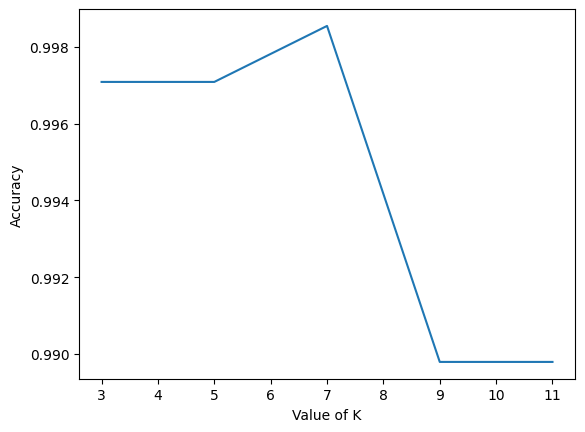

In [202]:
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [203]:
k_star = Range_k[scores_list.index(max(scores_list))]
print("k* value is " + str(k_star))

k* value is 7


In [204]:
y_pred = classifier.predict(X_test)
temp = data_test
temp["predict"] = y_pred

tp = temp[temp["predict"]==temp["class"]][temp["predict"] == 0].shape[0]
fp = temp[temp["predict"]!=temp["class"]][temp["predict"] == 0].shape[0]
tn = temp[temp["predict"]==temp["class"]][temp["predict"] == 1].shape[0]
fn = temp[temp["predict"]!=temp["class"]][temp["predict"] == 1].shape[0]
print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
print("TPR -",tp/(tp+fn))
print("TNR -",tn/(tn+fp))

TP - 376 , FP - 0 , TN - 303 , FN -  7
TPR - 0.9817232375979112
TNR - 1.0


In [205]:
pd.DataFrame([[tp,fp,tn,fn,temp[temp["predict"]==temp["class"]].shape[0]/temp.shape[0], tp/(tp+fn), tn/(tn+fp)]], columns=["TP", "FP", "TN", "FN", "accuracy", "TPR", "TNR"], index=[""])

,TP,FP,TN,FN,accuracy,TPR,TNR
,376,0,303,7,0.989796,0.981723,1.0


In [222]:
classifier = KNeighborsClassifier(n_neighbors=k_star)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(scaler.transform(pd.DataFrame([["7","0","2","8"]])))
print("BU ID predicted class using simple classifier : " + str(0 if 7>-1 and 0>5 and 8>7 else 1))
print("BU ID predicted class using KNN : " + str(y_pred[0]))

BU ID predicted class using simple classifier : 1
BU ID predicted class using KNN : 0


In [207]:
for tmp in [[ "f_2", "f_3", "f_4"], ["f_1",  "f_3", "f_4"], ["f_1", "f_2",  "f_4"], ["f_1", "f_2", "f_3"]]:
    scaler = StandardScaler()
    X_train = data_train
    scaler.fit(X_train[tmp])
    X_test = data_test[tmp]
    y_train = data_train["class"]
    y_test = data_test["class"]
    X_train = scaler.transform(X_train[tmp])
    X_test = scaler.transform(X_test)
    classifier = KNeighborsClassifier(n_neighbors=k_star)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    temp = data_test
    temp["predict"] = y_pred
    print("Accuracy for the columns "+str(tmp) + " when using KNN algorithm : " + str(temp[temp["predict"] == temp["class"]].shape[0]/temp.shape[0]))

Accuracy for the columns ['f_2', 'f_3', 'f_4'] when using KNN algorithm : 0.9606413994169096
Accuracy for the columns ['f_1', 'f_3', 'f_4'] when using KNN algorithm : 0.967930029154519
Accuracy for the columns ['f_1', 'f_2', 'f_4'] when using KNN algorithm : 0.9708454810495627
Accuracy for the columns ['f_1', 'f_2', 'f_3'] when using KNN algorithm : 0.9956268221574344


In [217]:
X_train = data_train[["f_1", "f_2", "f_3", "f_4"]]
X_test = data_test[["f_1", "f_2", "f_3", "f_4"]]
y_train = data_train["class"]
y_test = data_test["class"]
LRG = linear_model.LogisticRegression(
   random_state = 0,solver = 'liblinear',multi_class = 'auto'
).fit(X_train, y_train)
print("Logistic Regression accuracy : "+ str(LRG.score(X_test, y_test)))
y_pred = LRG.predict(X_test)
temp = data_test
temp["predict"] = y_pred

tp = temp[temp["predict"]==temp["class"]][temp["predict"] == 0].shape[0]
fp = temp[temp["predict"]!=temp["class"]][temp["predict"] == 0].shape[0]
tn = temp[temp["predict"]==temp["class"]][temp["predict"] == 1].shape[0]
fn = temp[temp["predict"]!=temp["class"]][temp["predict"] == 1].shape[0]
print("TP -",tp,", FP -",fp,", TN -",tn,", FN - ",fn)
print("TPR -",tp/(tp+fn))
print("TNR -",tn/(tn+fp))

Logistic Regression accuracy : 0.9897959183673469
TP - 377 , FP - 1 , TN - 302 , FN -  6
TPR - 0.9843342036553525
TNR - 0.9966996699669967


In [209]:
pd.DataFrame([[tp,fp,tn,fn,temp[temp["predict"]==temp["class"]].shape[0]/temp.shape[0], tp/(tp+fn), tn/(tn+fp)]], columns=["TP", "FP", "TN", "FN", "accuracy", "TPR", "TNR"], index=[""])

,TP,FP,TN,FN,accuracy,TPR,TNR
,377,1,302,6,0.989796,0.984334,0.9967


In [223]:
y_pred = LRG.predict(pd.DataFrame([["7","0","2","8"]]))
print("BU ID predicted class using simple classifier : " + str(0 if 7>-1 and 0>5 and 8>7 else 1))
print("BU ID predicted class using Logistic Regression : " + str(y_pred[0]))

BU ID predicted class using simple classifier : 1
BU ID predicted class using Logistic Regression : 0


In [211]:
for tmp in [[ "f_2", "f_3", "f_4"], ["f_1",  "f_3", "f_4"], ["f_1", "f_2",  "f_4"], ["f_1", "f_2", "f_3"]]:
    X_train = data_train[tmp]
    X_test = data_test[tmp]
    y_train = data_train["class"]
    y_test = data_test["class"]
    LRG = linear_model.LogisticRegression(
    random_state = 0,solver = 'liblinear',multi_class = 'auto'
    ).fit(X_train, y_train)
    y_pred = LRG.predict(X_test)
    temp = data_test
    temp["predict"] = y_pred
    temp = data_test
    temp["predict"] = y_pred
    print("Accuracy for the columns "+str(tmp) + " when using Logistic Regression algorithm : " + str(temp[temp["predict"] == temp["class"]].shape[0]/temp.shape[0]))

Accuracy for the columns ['f_2', 'f_3', 'f_4'] when using Logistic Regression algorithm : 0.8032069970845481
Accuracy for the columns ['f_1', 'f_3', 'f_4'] when using Logistic Regression algorithm : 0.8950437317784257
Accuracy for the columns ['f_1', 'f_2', 'f_4'] when using Logistic Regression algorithm : 0.8717201166180758
Accuracy for the columns ['f_1', 'f_2', 'f_3'] when using Logistic Regression algorithm : 0.9897959183673469
